<a href="https://colab.research.google.com/github/rajeshchengannur/MachineLearning/blob/main/ProbabilityDistribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Probability Mass Function

Ramdon experiment of tossing a dice 10000 times and store the outcome to an list and finding the probability

In [1]:
import pandas as pd
import random

In [9]:
L=[]
for i in range(10000):
  L.append(random.randint(1,6))

In [10]:
L[:5]

[3, 5, 3, 5, 1]

In [11]:
s=(pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()

In [12]:
s

1    0.1678
2    0.1696
3    0.1685
4    0.1653
5    0.1671
6    0.1617
dtype: float64

<Axes: >

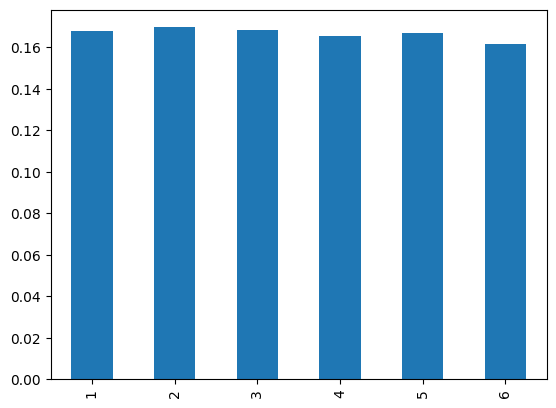

In [13]:
s.plot(kind='bar')

So the probability distribution is 1/6 approximately in every case

Do the same for  2 dice and taking the sum

In [16]:
P=[]
for i in range(10000):
  a=random.randint(1,6)
  b=random.randint(1,6)
  P.append(a+b)


In [17]:
P[:5]

[9, 5, 6, 6, 3]

In [18]:
s=(pd.Series(P).value_counts()/pd.Series(P).value_counts().sum()).sort_index()

In [19]:
s

2     0.0276
3     0.0556
4     0.0806
5     0.1181
6     0.1403
7     0.1673
8     0.1399
9     0.1016
10    0.0844
11    0.0562
12    0.0284
dtype: float64

<Axes: >

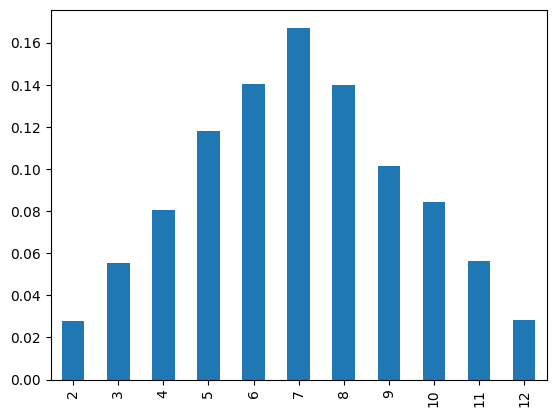

In [20]:
s.plot(kind='bar')

CDF of PMF

<Axes: >

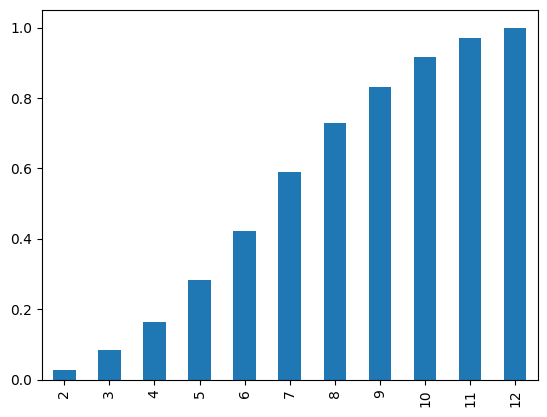

In [22]:
import numpy as np
np.cumsum(s).plot(kind='bar')

This means probability of getting 6 or less than 6 is 43%

#Probability Density Function

Parametric Density Estimation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

In [2]:
sample =normal(loc=50,scale=5,size=1000)
#generated data with mean 50  standard devaiotn 5 and 1000 samples

In [3]:
sample.mean()

49.82053024623303

(array([  3.,  24.,  76., 177., 225., 235., 154.,  68.,  31.,   7.]),
 array([34.68905199, 37.71744005, 40.74582811, 43.77421616, 46.80260422,
        49.83099227, 52.85938033, 55.88776839, 58.91615644, 61.9445445 ,
        64.97293255]),
 <BarContainer object of 10 artists>)

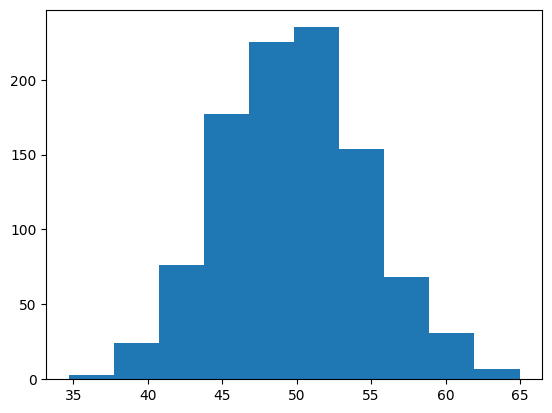

In [4]:
plt.hist(sample,bins=10)

In [5]:
# calculate the sample mean and sample std

sample_mean = sample.mean()
sample_std =sample.std()

In [7]:
# Fit the distribution with above parameter
from scipy.stats import norm
dist = norm(sample_mean,sample_std)

In [8]:
values =np.linspace(sample.min(),sample.max(),100)

In [9]:
probabilities=[dist.pdf(value) for value in values]

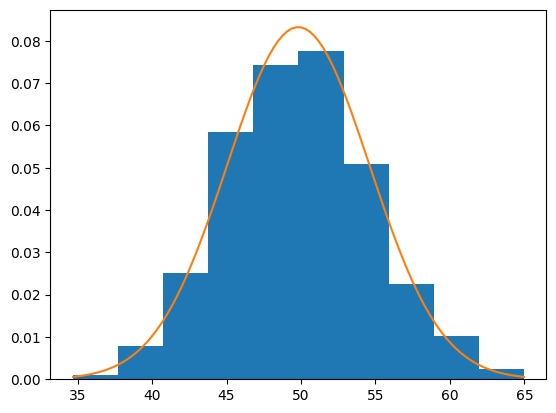

In [10]:
plt.hist(sample,bins=10,density=True)
plt.plot(values,probabilities)

<ipython-input-11-8cd219d00d27>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)


<Axes: ylabel='Density'>

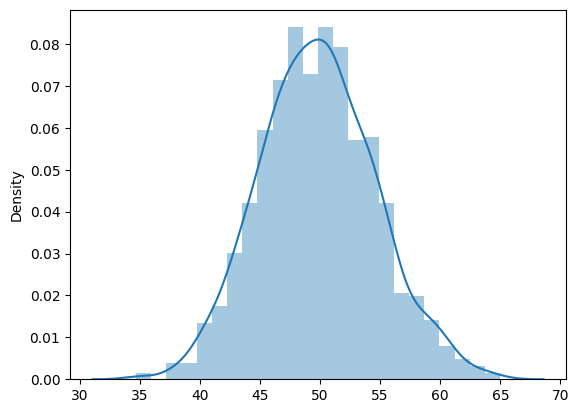

In [11]:
import seaborn as sns
sns.distplot(sample)

#KDE

In [12]:
sample1 =normal(loc=20,scale=5,size=300)
sample2= normal(loc=40,scale=5,size=700)
sample=np.hstack((sample1,sample2))

In [14]:
sample.size


1000

(array([ 2.,  5.,  5., 12.,  9., 10., 15., 13., 14., 23., 26., 18., 25.,
        26., 17., 25., 15., 17.,  7.,  6.,  5.,  5.,  6., 10., 10., 22.,
        22., 27., 38., 31., 48., 44., 38., 58., 63., 39., 40., 47., 30.,
        29., 23., 27., 17.,  7.,  9.,  3.,  5.,  2.,  4.,  1.]),
 array([ 9.16314903, 10.07432117, 10.9854933 , 11.89666544, 12.80783757,
        13.71900971, 14.63018184, 15.54135398, 16.45252611, 17.36369825,
        18.27487039, 19.18604252, 20.09721466, 21.00838679, 21.91955893,
        22.83073106, 23.7419032 , 24.65307533, 25.56424747, 26.4754196 ,
        27.38659174, 28.29776387, 29.20893601, 30.12010815, 31.03128028,
        31.94245242, 32.85362455, 33.76479669, 34.67596882, 35.58714096,
        36.49831309, 37.40948523, 38.32065736, 39.2318295 , 40.14300163,
        41.05417377, 41.96534591, 42.87651804, 43.78769018, 44.69886231,
        45.61003445, 46.52120658, 47.43237872, 48.34355085, 49.25472299,
        50.16589512, 51.07706726, 51.98823939, 52.89941153,

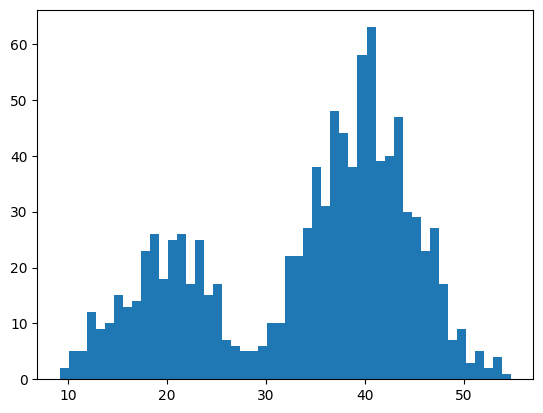

In [15]:
plt.hist(sample,bins=50)

In [24]:
from sklearn.neighbors import KernelDensity
model=KernelDensity(bandwidth=3,kernel='gaussian')
sample=sample.reshape((len(sample),1))
model.fit(sample)

KernelDensity(bandwidth=3)

In [25]:
values =np.linspace(sample.min(),sample.max(),100)
values=values.reshape((len(values),1))

In [26]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

#score_sample(valeus) returns the log density estimate of the input sample values. to convert this into actual we take the exponet

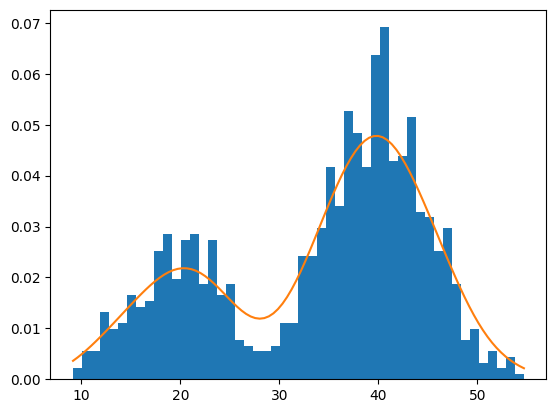

In [27]:
plt.hist(sample,bins=50,density=True)
plt.plot(values[:],probabilities)
plt.show()

<Axes: ylabel='Density'>

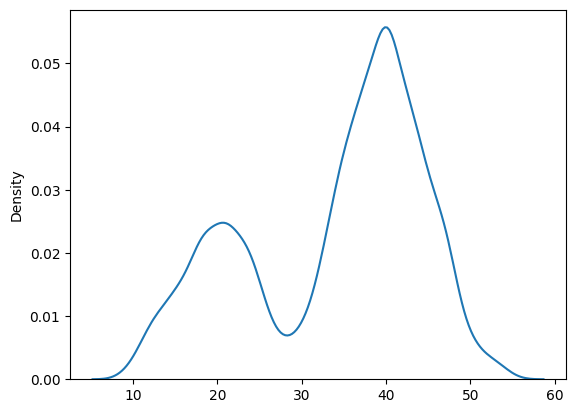

In [31]:
sns.kdeplot(sample.reshape(1000),bw_adjust=0.5)